# **Carolina Pabón Rúa**

#Solucion 1


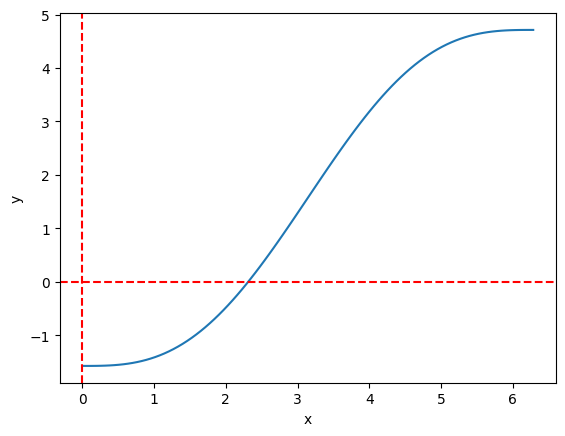

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def funcion(x):
  return x - np.sin(x) - np.pi/2

x= np.linspace(0,2*np.pi,100)
y= funcion(x)

plt.plot(x,y)
plt.axhline(0,color='red',linestyle='--')
plt.axvline(0,color='red',linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
import sympy as sp
from scipy.optimize import fsolve,bisect,newton,root_scalar,fixed_point

f= lambda x: x - np.sin(x) - np.pi/2
g = lambda x: np.sin(x) + np.pi/2

raiz_biseccion = bisect(f, 0.5 , 2.5)
raiz_punto_fijo = fixed_point(g,1.5)
raiz_secante = root_scalar(f, x0=1.8,method='secant').root

x= sp.symbols('x')
f_= x - sp.sin(x)- sp.pi/2
df= sp.diff(f_,x)
df = sp.lambdify(x,df,'numpy')
raiz_newton = newton(f,1.8,df)

print(f'La raiz encontrada a través del método de bisección es de {raiz_biseccion} ')
print(f'La raiz encontrada a través del método de punto fijo es de {raiz_punto_fijo}')
print(f'La raiz encontrada a través del método de secante es de {raiz_secante}')
print(f'La raiz encontrada a través del método de newton es de {raiz_newton}')

La raiz encontrada a través del método de bisección es de 2.309881460010729 
La raiz encontrada a través del método de punto fijo es de 2.3098814600100575
La raiz encontrada a través del método de secante es de 2.309881460010057
La raiz encontrada a través del método de newton es de 2.3098814600100575


# Solucion 2


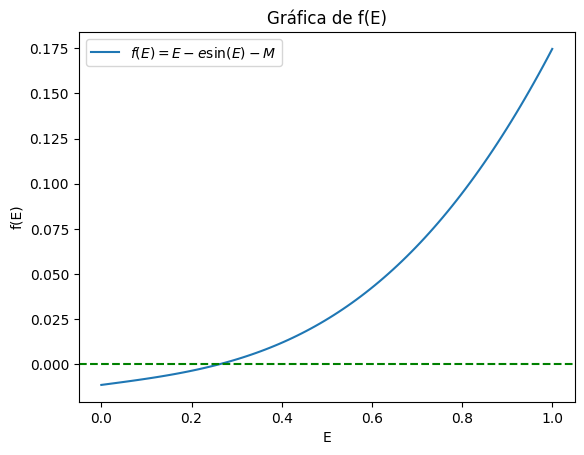

In [7]:
e=0.9672671
T=75.96000
t0=1986.1113
t_abril=1986.2491

def f(E,e,M):
  return E - e*np.sin(E)-M

M_abril= (2*np.pi/T)*(t_abril - t0)

E_vals = np.linspace(0,1, 100)
f_vals = f(E_vals,e,M_abril)
plt.plot(E_vals, f_vals, label=r"$f(E) = E - e\sin(E) - M$")
plt.axhline(0, color='green', linestyle='--')
plt.xlabel("E")
plt.ylabel("f(E)")
plt.legend()
plt.title("Gráfica de f(E)")
plt.show()

In [6]:
try:
   E_newton = newton(lambda E: f(E, e, M_abril), x0=0.5, fprime=lambda E: 1 - e * np.cos(E))
except RuntimeError:
    E_newton = None

E_secante = root_scalar(f, args=(e,M_abril), method='secant',x0=0.5,x1 = 1).root

print(f'E(Newton) = {E_newton}')
print(f'E(Secante) = {E_secante} ')

E(Newton) = 0.260978604774748
E(Secante) = 0.2609786047747516 


In [10]:
num_puntos = 100
delta_t = T/num_puntos
ti_vals = np.array([t0 + i * delta_t for i in range(num_puntos)])
M_vals = (2*np.pi / T )*(ti_vals-t0)
E_vals = []
for M in M_vals:
  try:
    E_vals.append(newton(f,x0=0.5, fprime = lambda E:1 - e * np.cos(E), args = (e,M)))
  except:
    E_vals.append(None)

In [12]:

# Convertir lista en array de NumPy y eliminar valores None
E_vals = np.array([E for E in E_vals if E is not None])

# Verificar que haya datos antes de graficar
if len(E_vals) > 0:
    plt.plot(ti_vals[:len(E_vals)], E_vals, label="$E(t)$")  # Ajustar ejes
    plt.xlabel("Tiempo (años)")
    plt.ylabel("E")
    plt.legend()
    plt.title("Evolución de la anomalía excéntrica E(t)")
    plt.show()
else:
    print("No se pudo calcular E(t) para ningún valor de M.")

No se pudo calcular E(t) para ningún valor de M.


#Solucion 3


In [21]:
m = lambda x: x- np.tanh(x/0.5)
s = lambda x: np.tanh(x/0.5)

raiz_secant= root_scalar(m, x0=0.5,method = 'secant').root #Metodo secante

x= sp.symbols('x')
m_ = x - sp.tanh(x/0.5)
dm = sp.diff(m_,x)
dm = sp.lambdify(x,dm,'numpy')
raiz_newt= newton(m,0.5,dm) #Metodo Newton-Rapson

raiz_punto = fixed_point(s,0.5) #Metodo Punto Fijo

print(f'Magnetización reducida con metodo secante es = {raiz_secant:.4f}')
print(f'Magnetización reducida con metodo Newton es = {raiz_newt:.4f}')
print(f'Magnetización reducida con metodo Punto fijo  es = {raiz_punto:.4f}')


Magnetización reducida con metodo secante es = 0.9575
Magnetización reducida con metodo Newton es = 0.9575
Magnetización reducida con metodo Punto fijo  es =0.9575


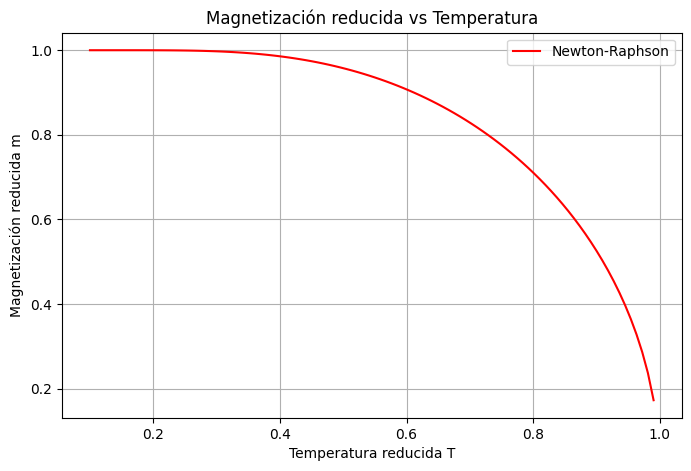

In [27]:
T_values = np.linspace(0.1, 0.99, 100)
m_values = []
for T in T_values:
    funcion_m = lambda m: m - np.tanh(m / T)
    m_sym = sp.symbols('m')
    funcion_m_sym = m_sym - sp.tanh(m_sym / T)
    derivada_m_sym = sp.diff(funcion_m_sym, m_sym)
    derivada_m = sp.lambdify(m_sym, derivada_m_sym, 'numpy')
    m_values.append(newton(funcion_m, 1.0, derivada_m))

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(T_values, m_values, label='Newton-Raphson', color='r')
plt.xlabel('Temperatura reducida T')
plt.ylabel('Magnetización reducida m')
plt.title('Magnetización reducida vs Temperatura')
plt.legend()
plt.grid()
plt.show()
